In [ ]:
!pip install pillow


In [29]:
import pandas as pd
# Import required libraries
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.feature import canny


Total images loaded: 200


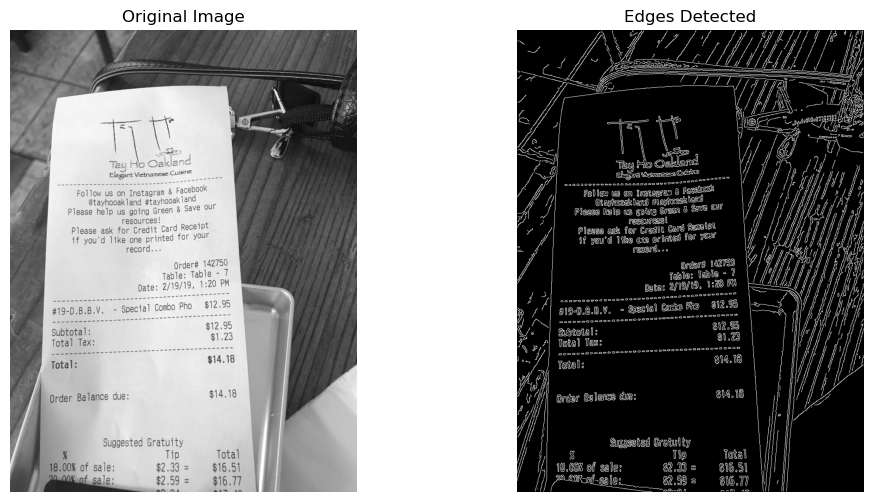

In [30]:
# Step 1: Load and preprocess images
def preprocess_image(image_path):
    """
    Load and preprocess a single image (convert to grayscale, detect edges).

    Args:
        image_path (str): Path to the input image.

    Returns:
        edges (numpy array): Edges detected using Canny edge detection.
        original_image (PIL Image): The original grayscale image for reference.
    """
    try:
        # Load image and convert to grayscale
        original_image = Image.open(image_path).convert("L")  # Grayscale conversion
        
        # Convert image to numpy array
        img_array = np.array(original_image)
        
        # Apply Canny edge detection
        edges = canny(img_array, sigma=1.0)  # Experiment with sigma for better results
        
        return edges, original_image

    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None, None

# Load dataset using glob
image_fns = glob("Receipt dataset Large/*")  # Adjust the path to your dataset
print(f"Total images loaded: {len(image_fns)}")

# Test preprocessing on one image
image_path = image_fns[0]  # Use the first image for testing
edges, original_image = preprocess_image(image_path)

# Display the results
if edges is not None:
    # Original grayscale image
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap="gray")
    plt.title("Original Image")
    plt.axis("off")
    
    # Edges detected
    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap="gray")
    plt.title("Edges Detected")
    plt.axis("off")
    plt.show()
else:
    print("Failed to preprocess the image.")


In [31]:
import easyocr

def extract_text(original_image):
  """
  Extract text from the cropped receipt image using easyocr.

  Args:
      cropped_image (PIL Image): The cropped receipt image.

  Returns:
      list: List of detected text strings.
  """
  try:
    reader = easyocr.Reader(['en'])  # Initialize reader for English
    result = reader.readtext(np.array(original_image)) 
    text_list = [r[1] for r in result] 
    return text_list
  except Exception as e:
    print(f"Error extracting text: {e}")
    return []

# ... (Rest of your code, assuming you have cropped_image)

# Step 3: Extract text from the cropped image
if cropped_image:
  extracted_text = extract_text(original_image)

  if extracted_text:
    print("Extracted Text:")
    for text in extracted_text:
      print(text)
  else:
    print("No text detected in the image.")

Extracted Text:
Ho
Victnamesc Cuisinc
Fol low us on Instagram &
Facebook
@tayhooak land
#tayhooak Iand
Please help us going Green & Save
our
resources
Please ask for Credit Card Receipt
if you'd
Tike one printed for
record,
Order# 142750
Table: Table
Date: 2/19/19, 1:20 PM
#19-D,B,B.V ,
Specia] Combo Pho
812,95
812.95
Subtota]
81,23
Tota]
Tax:
814.18
Tota]
Order Balance due:
814,18
Suggested Gratuity
Tip
Tota]
18,00X of sale:
82,33
816,51
20 OOYof sale:
82.59
816,77
Oakiand
Tay
Elegunt
your
